In [0]:
#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Time%20Series%20ANN%20%26%20LSTM%20VIX.ipynb
#https://towardsdatascience.com/an-introduction-on-time-series-forecasting-with-simple-neura-networks-lstm-f788390915b
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
import numpy

Using TensorFlow backend.


In [0]:
df = pd.read_excel('/content/snow dates.xlsx')


In [0]:
print(df.head())


        Date  Average of SNOW Avg. Number of Pixels
0 2001-01-01                               6790.325
1 2001-02-01                               6497.100
2 2001-03-01                               6900.650
3 2001-04-01                               5850.500
4 2001-05-01                               4088.100


In [0]:
#df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'], axis=1, inplace=True)


In [0]:
df['Date'] = pd.to_datetime(df['Date'])


In [0]:
df = df.set_index(['Date'], drop=True)

In [0]:
print(df.head())


            Average of SNOW Avg. Number of Pixels
Date                                             
2001-01-01                               6790.325
2001-02-01                               6497.100
2001-03-01                               6900.650
2001-04-01                               5850.500
2001-05-01                               4088.100


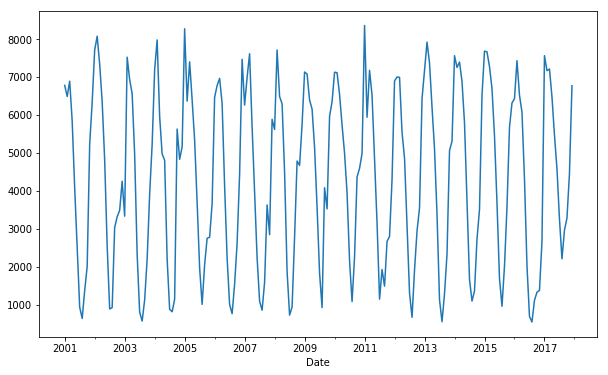

In [0]:
# df = df.sort_index()
plt.figure(figsize=(10, 6))
df['Average of SNOW Avg. Number of Pixels'].plot();

In [0]:
split_date = pd.Timestamp('2012-12-01')


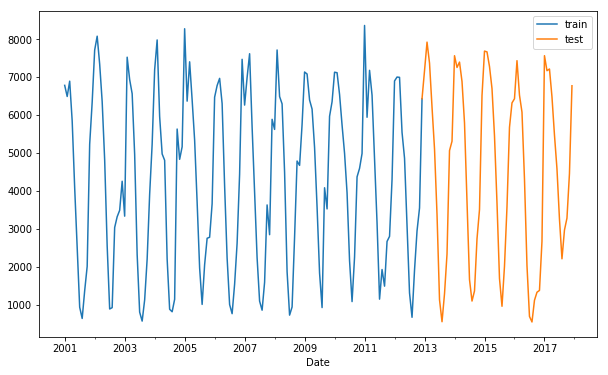

In [0]:
df =  df['Average of SNOW Avg. Number of Pixels']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [0]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train.values.reshape(-1, 1))
test_sc = scaler.transform(test.values.reshape(-1, 1))

In [0]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

## **NN**

In [0]:

nn_model = Sequential()
nn_model.add(Dense(8, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
143/143 [==============================] - 1s 10ms/step - loss: 0.5441
Epoch 2/100
143/143 [==============================] - 0s 937us/step - loss: 0.3464
Epoch 3/100
143/143 [==============================] - 0s 975us/step - loss: 0.2284
Epoch 4/100
143/143 [==============================] - 0s 933us/step - loss: 0.1704
Epoch 5/100
143/143 [==============================] - 0s 950us/step - loss: 0.1483
Epoch 6/100
143/143 [==============================] - 0s 939us/step - loss: 0.1408
Epoch 7/100
143/143 [==============================] - 0s 949us/step - loss: 0.1384
Epoch 8/100
143/143 [==============================] - 0s 942us/step - loss: 0.1376
Epoch 9/100
143/143 [==============================] - 0s 938us/step - loss: 0.1371
Epoch 10/100
143/143 [==============================] - 0s 895us/step - loss: 0.1367
Epoch 11/100
143/143 [==============================] - 0s 868us/step - loss: 0.1365
Epoch 12/100
143/143 [==============================] - 0s 867us/step - los

In [0]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.601
The R2 score on the Test set is:	0.660


## **LSTM**

In [0]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:
X_train_lmse = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lmse = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (143, 1, 1)
Test shape:  (60, 1, 1)


In [0]:
lstm_model = Sequential()
lstm_model.add(LSTM(90, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=2, shuffle=False, callbacks=[early_stop])

Epoch 1/100
 - 2s - loss: 0.2344
Epoch 2/100
 - 0s - loss: 0.1429
Epoch 3/100
 - 0s - loss: 0.1371
Epoch 4/100
 - 0s - loss: 0.1368
Epoch 5/100
 - 0s - loss: 0.1367
Epoch 6/100
 - 0s - loss: 0.1366
Epoch 7/100
 - 0s - loss: 0.1365
Epoch 8/100
 - 0s - loss: 0.1365
Epoch 9/100
 - 0s - loss: 0.1364
Epoch 10/100
 - 0s - loss: 0.1363
Epoch 11/100
 - 0s - loss: 0.1362
Epoch 12/100
 - 0s - loss: 0.1362
Epoch 13/100
 - 0s - loss: 0.1361
Epoch 14/100
 - 0s - loss: 0.1361
Epoch 15/100
 - 0s - loss: 0.1360
Epoch 16/100
 - 0s - loss: 0.1359
Epoch 17/100
 - 0s - loss: 0.1359
Epoch 18/100
 - 0s - loss: 0.1358
Epoch 19/100
 - 0s - loss: 0.1358
Epoch 20/100
 - 0s - loss: 0.1357
Epoch 21/100
 - 0s - loss: 0.1357
Epoch 22/100
 - 0s - loss: 0.1356
Epoch 23/100
 - 0s - loss: 0.1356
Epoch 24/100
 - 0s - loss: 0.1355
Epoch 25/100
 - 0s - loss: 0.1355
Epoch 26/100
 - 0s - loss: 0.1354
Epoch 27/100
 - 0s - loss: 0.1354
Epoch 28/100
 - 0s - loss: 0.1353
Epoch 29/100
 - 0s - loss: 0.1353
Epoch 30/100
 - 0s - lo

In [0]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.609
The R2 score on the Test set is:	0.674


In [0]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

60/60 [==============================] - 0s 779us/step
NN: 0.129244
LSTM: 0.123764


In [0]:
nn_y_pred_test = nn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

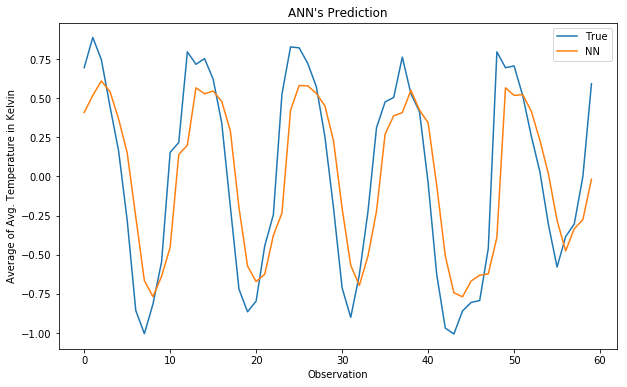

In [0]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Average of Avg. Temperature in Kelvin')
plt.legend()
plt.show();

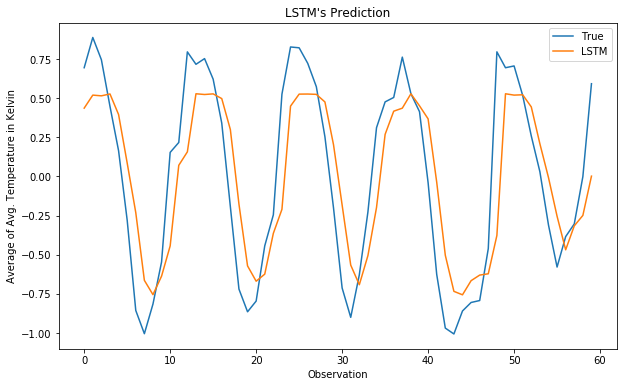

In [0]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Average of Avg. Temperature in Kelvin')
plt.legend()
plt.show();